In [1]:
from lib.Environment_refactored import DeepTradingEnvironment, LinearAgent
import datetime
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.cla import CLA

out_reward_window=datetime.timedelta(days=7)
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window":out_reward_window ,
                   "state_type":"in_window_out_window"}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001,
                        }
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)


assets_simulation_details={"asset_1":{"method":"GBM","sigma":.01,"mean":.02},
                    "asset_2":{"method":"GBM","sigma":.03,"mean":.18}}

env=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,
                                                                     data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,
                                                                     objective_parameters=objective_parameters)
cov=np.array([[assets_simulation_details["asset_1"]["sigma"]**2,0],[0,assets_simulation_details["asset_2"]["sigma"]**2]])
mus=np.array([assets_simulation_details["asset_1"]["mean"],assets_simulation_details["asset_2"]["mean"]])

ef = EfficientFrontier(mus, cov)
# weights = ef.max_sharpe(risk_free_rate=0)
weights = ef.min_volatility()
print("minum volatility weights",weights)


===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(days=7), 'state_type': 'in_window_out_window'}
===Objective Parameters===
{'percent_commission': 0.001}
minum volatility weights OrderedDict([(0, 0.8999999999996016), (1, 0.1000000000003984)])


In [2]:

x=np.array(list(weights.values())).reshape(-1,1)
p_vol=np.sqrt(np.matmul(np.matmul(x.T,cov),x))
p_sharpe=np.matmul(x.T,mus)/p_vol
linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
                         reward_function="cum_return",sample_observations=32)
linear_agent.set_plot_weights(weights=np.array(list(weights.values())),
                              benchmark_G=-p_vol.ravel()[0])

pre-sampling indices: 100%|████████████████████████████████████████████████████████| 1373/1373 [00:27<00:00, 50.63it/s]


  2%|█▌                                                                            | 200/10000 [00:29<24:08,  6.77it/s]

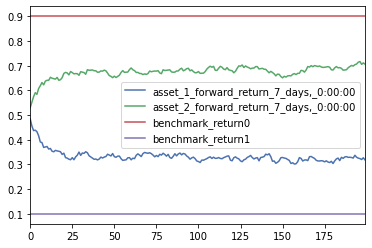

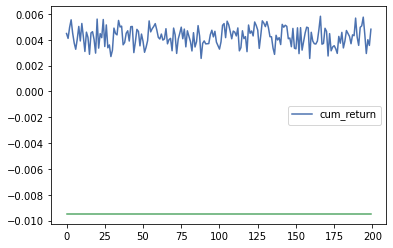

  4%|███                                                                           | 400/10000 [00:59<24:58,  6.41it/s]

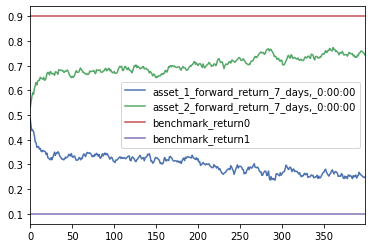

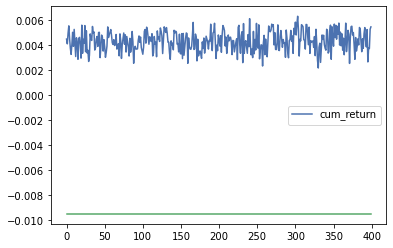

  6%|████▋                                                                         | 600/10000 [01:30<22:55,  6.83it/s]

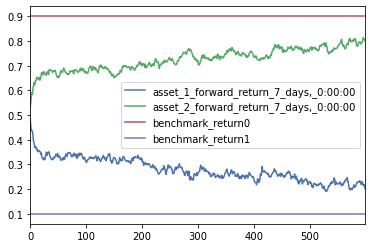

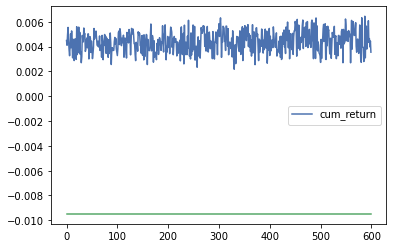

  8%|██████▏                                                                       | 800/10000 [02:00<22:16,  6.89it/s]

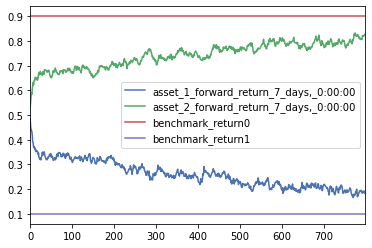

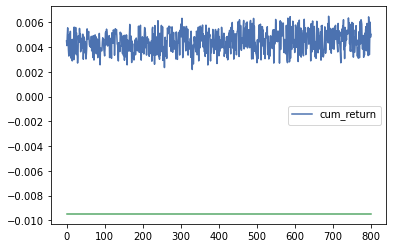

 10%|███████▋                                                                     | 1000/10000 [02:29<20:38,  7.27it/s]

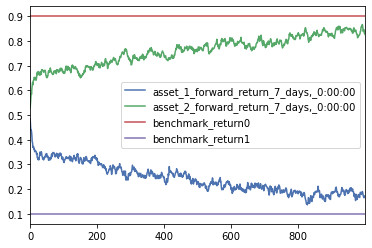

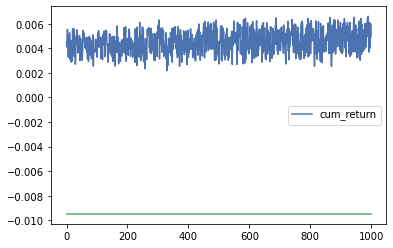

 12%|█████████▏                                                                   | 1200/10000 [02:59<20:14,  7.25it/s]

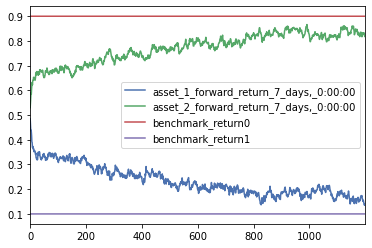

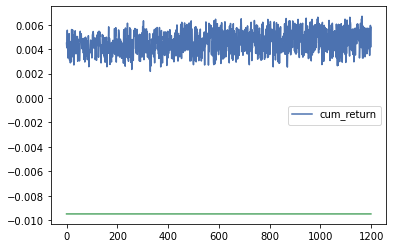

 14%|██████████▊                                                                  | 1400/10000 [03:28<20:07,  7.12it/s]

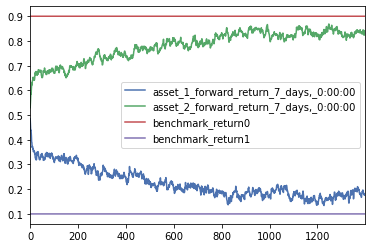

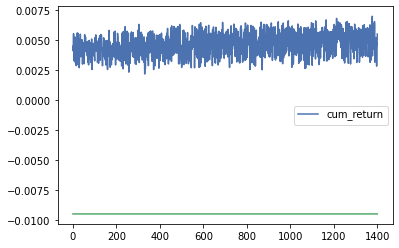

 16%|████████████▎                                                                | 1600/10000 [03:58<20:37,  6.79it/s]

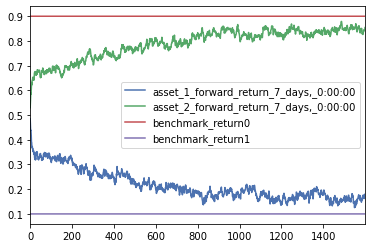

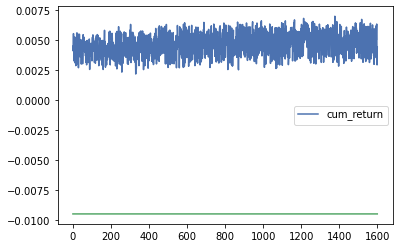

 18%|█████████████▊                                                               | 1800/10000 [04:27<19:54,  6.86it/s]

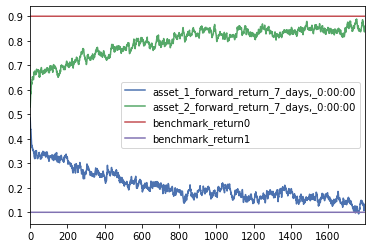

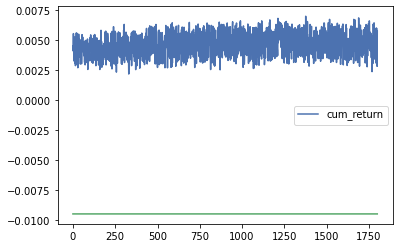

 20%|███████████████▍                                                             | 2000/10000 [04:58<20:10,  6.61it/s]

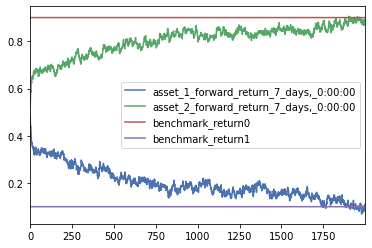

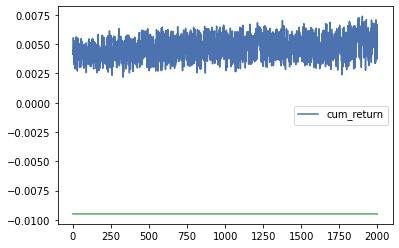

 22%|████████████████▉                                                            | 2200/10000 [05:29<20:47,  6.25it/s]

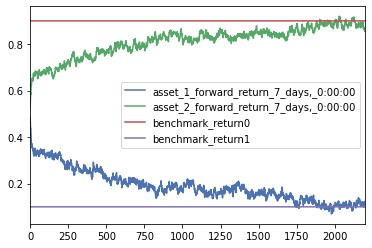

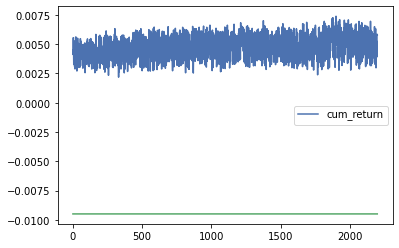

 24%|██████████████████▍                                                          | 2400/10000 [06:00<19:08,  6.62it/s]

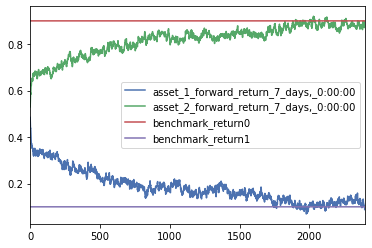

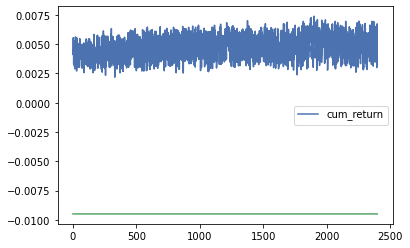

 26%|████████████████████                                                         | 2600/10000 [06:33<19:16,  6.40it/s]

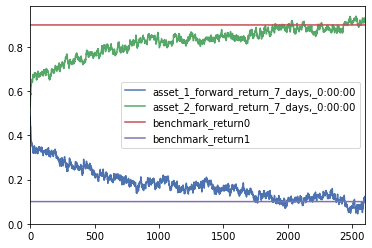

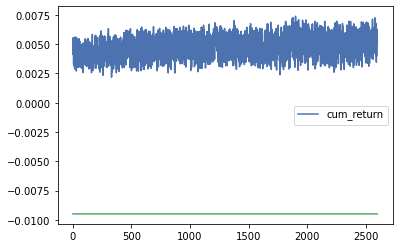

 28%|█████████████████████▌                                                       | 2800/10000 [07:07<44:35,  2.69it/s]

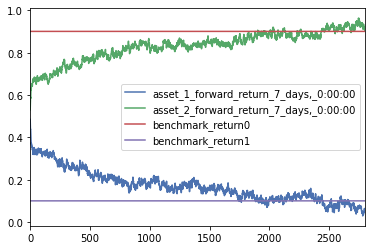

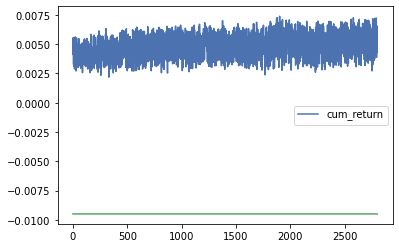

 30%|███████████████████████                                                      | 3000/10000 [07:41<16:29,  7.07it/s]

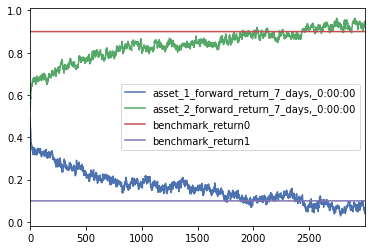

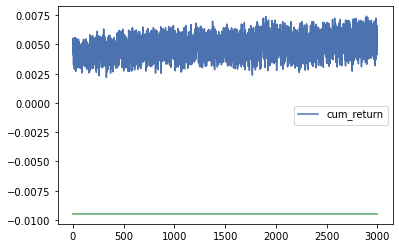

 32%|████████████████████████▋                                                    | 3200/10000 [08:13<17:23,  6.52it/s]

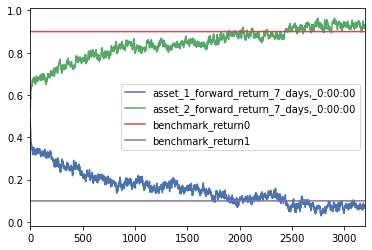

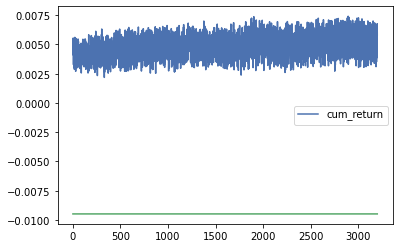

 34%|██████████████████████████▏                                                  | 3400/10000 [08:44<16:06,  6.83it/s]

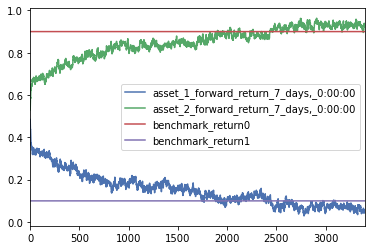

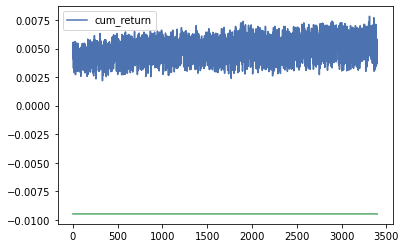

 36%|███████████████████████████▋                                                 | 3600/10000 [09:16<20:43,  5.15it/s]

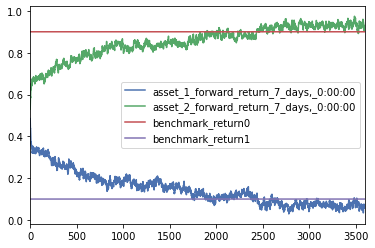

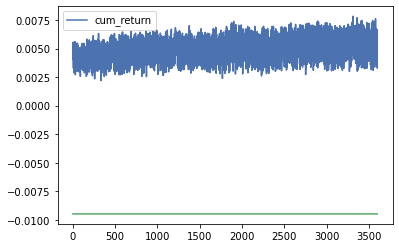

 38%|█████████████████████████████▎                                               | 3800/10000 [09:51<16:08,  6.40it/s]

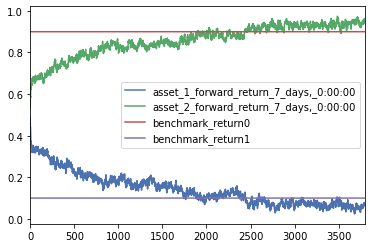

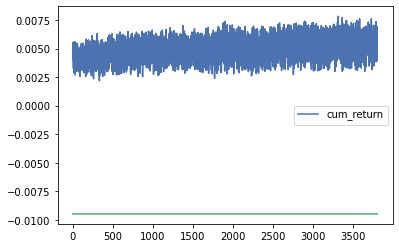

 40%|██████████████████████████████▊                                              | 4000/10000 [10:25<24:49,  4.03it/s]

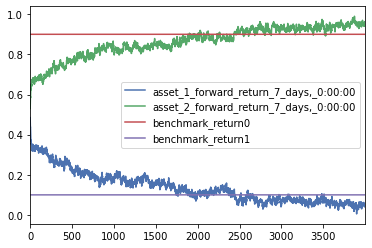

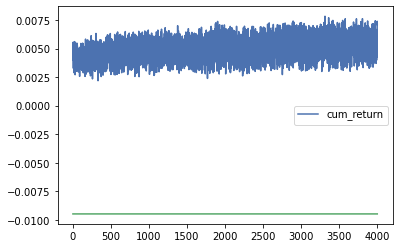

 42%|████████████████████████████████▎                                            | 4200/10000 [11:02<14:49,  6.52it/s]

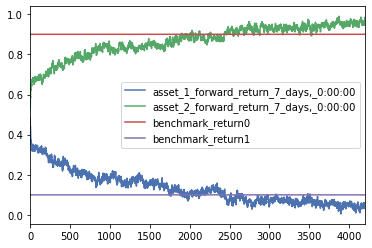

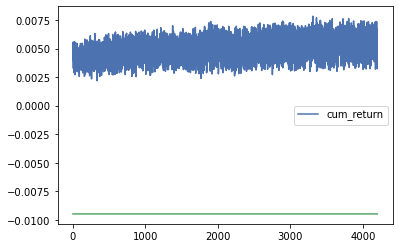

 44%|█████████████████████████████████▉                                           | 4400/10000 [11:33<13:59,  6.67it/s]

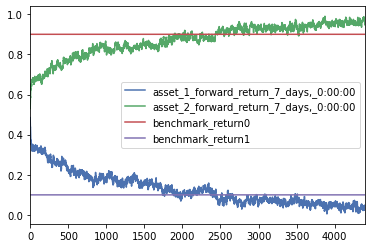

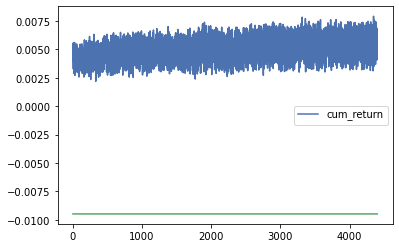

 46%|███████████████████████████████████▍                                         | 4600/10000 [12:06<13:40,  6.58it/s]

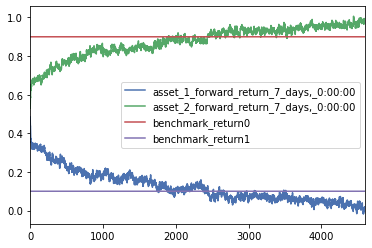

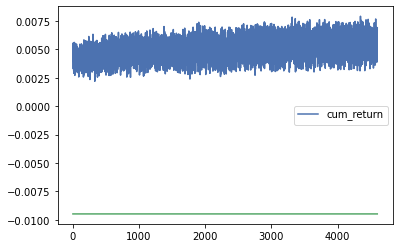

 48%|████████████████████████████████████▉                                        | 4800/10000 [12:37<12:56,  6.70it/s]

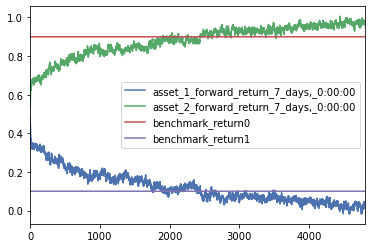

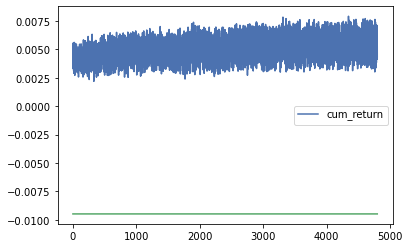

 50%|██████████████████████████████████████▌                                      | 5000/10000 [13:12<13:37,  6.12it/s]

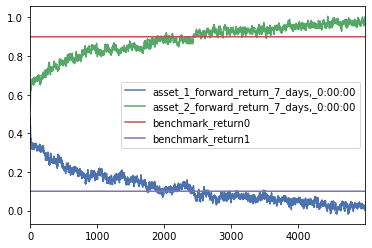

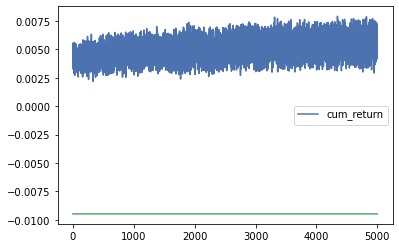

 52%|████████████████████████████████████████                                     | 5200/10000 [13:42<11:52,  6.74it/s]

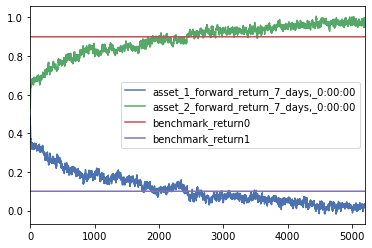

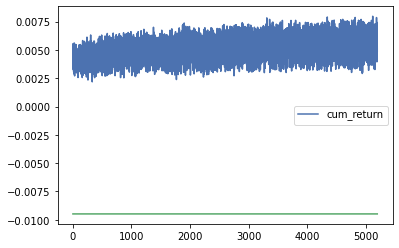

 54%|█████████████████████████████████████████▌                                   | 5400/10000 [14:14<11:46,  6.51it/s]

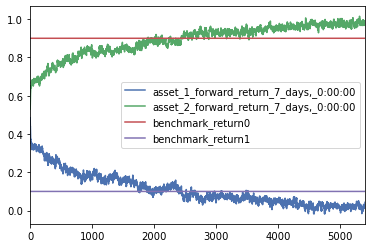

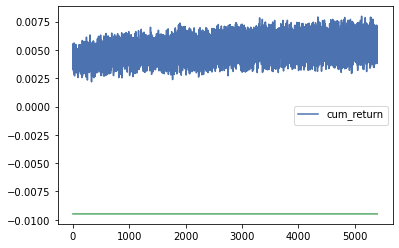

 56%|███████████████████████████████████████████                                  | 5600/10000 [14:49<13:05,  5.60it/s]

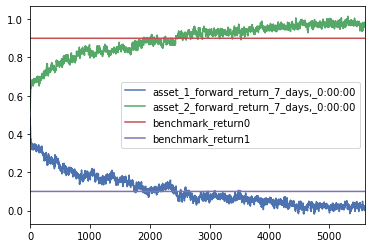

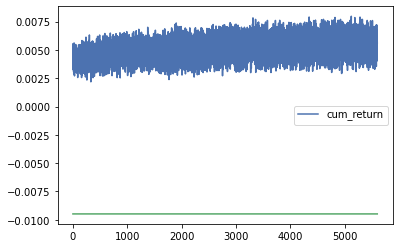

 57%|███████████████████████████████████████████▉                                 | 5705/10000 [15:16<19:51,  3.60it/s]

In [ ]:
linear_agent.REINFORCE_baseline_fit()